In [1]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os

In [3]:
dataset_path = './Fruits360'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '/Training',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_path + '/Validation',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,659,672 (25.40 MB)

 Trainable params: 6,659,672 (25.40 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.2426 - loss: 2.3642 - val_accuracy: 0.8182 - val_loss: 0.5351
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 28s 142ms/step - accuracy: 0.7387 - loss: 0.7421 - val_accuracy: 0.9457 - val_loss: 0.1925
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.8545 - loss: 0.4157 - val_accuracy: 0.9232 - val_loss: 0.1787
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.8811 - loss: 0.3195 - val_accuracy: 0.8770 - val_loss: 0.3037
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.9084 - loss: 0.2611 - val_accuracy: 0.9974 - val_loss: 0.0284
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - accuracy: 0.9381 - loss: 0.1728 - val_accuracy: 0.9746 - val_loss: 0.0745
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 32s 159ms/step - accuracy: 0.9303 - loss: 0.2011 - val_accuracy: 0.9923 - val_loss: 0.0277
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.9493 - loss: 0.1502 - val

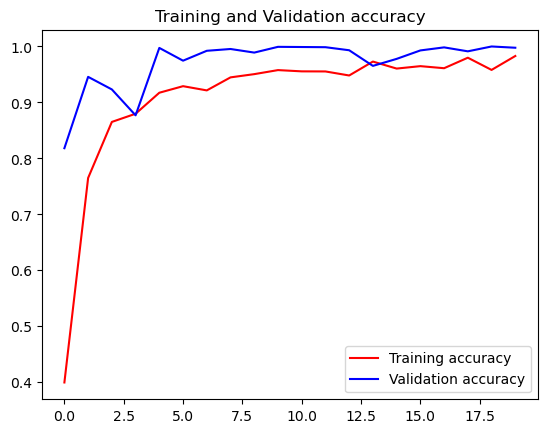

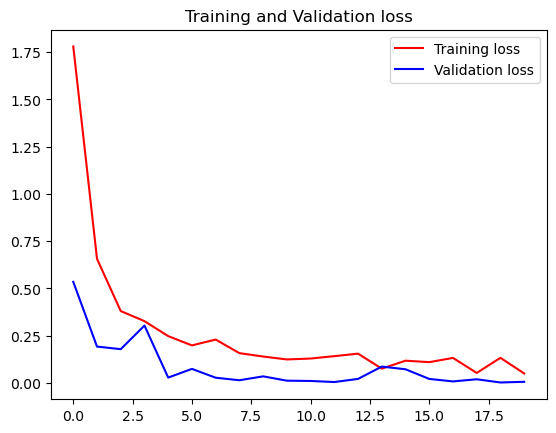

Found 3110 images belonging to 24 classes.
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9995 - loss: 0.0044
Test Accuracy: 1.00
Training Accuracy: 0.98, Validation Accuracy: 1.00, Test Accuracy: 1.00


In [7]:
# Plot accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Test the model using the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Test'),
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')

final_train_acc = acc[-1]
final_val_acc = val_acc[-1]
print(f'Training Accuracy: {final_train_acc:.2f}, Validation Accuracy: {final_val_acc:.2f}, Test Accuracy: {test_acc:.2f}')


In [8]:
model.save('fruit_classifier.h5')

In [9]:
pip install tensorflow pillow

Note: you may need to restart the kernel to use updated packages.


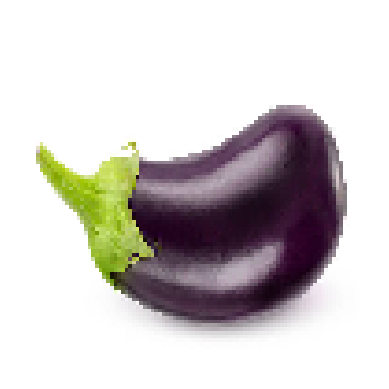

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Label: eggplant_long_1


In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Path to the image file
img_path = './testt_img8.jpg'  # Replace 'your_image.jpg' with your actual image filename

# Load and display the image
img = image.load_img(img_path, target_size=(100, 100))  # Ensure target_size matches your model input size (100x100)
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  # Scale the image to [0, 1] range

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class labels
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

print(f'Predicted Label: {predicted_label}')


# Fine Tuning this model with exisiting VGG16 model